In [1]:
# Importing necessary libraries
import pandas as pd  # pandas is used for data manipulation and analysis
import numpy as np  # numpy is used for numerical operations
import statsmodels.api as sm  # statsmodels is used for statistical modeling
from statsmodels.tsa.seasonal import seasonal_decompose  # Importing the seasonal_decompose function for time series decomposition
import matplotlib.pyplot as plt  # matplotlib is used for plotting graphs
import seaborn as sns  # seaborn is used for statistical data visualization
import warnings  # warnings is used to manage warnings
warnings.filterwarnings('ignore')  # Ignoring any warnings that might appear



In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('AirPassengers.csv')  # 'AirPassengers.csv' contains the dataset with air passenger numbers

# Set the 'Month' column as the index of the DataFrame
df.set_index('Month', inplace=True)  # Setting the 'Month' column as the index for easier time series manipulation

# Display the first few rows of the DataFrame to verify the data
df.head()  # Displaying the first five rows of the DataFrame to check the data structure and content


,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


### Exploratory Data Analysis

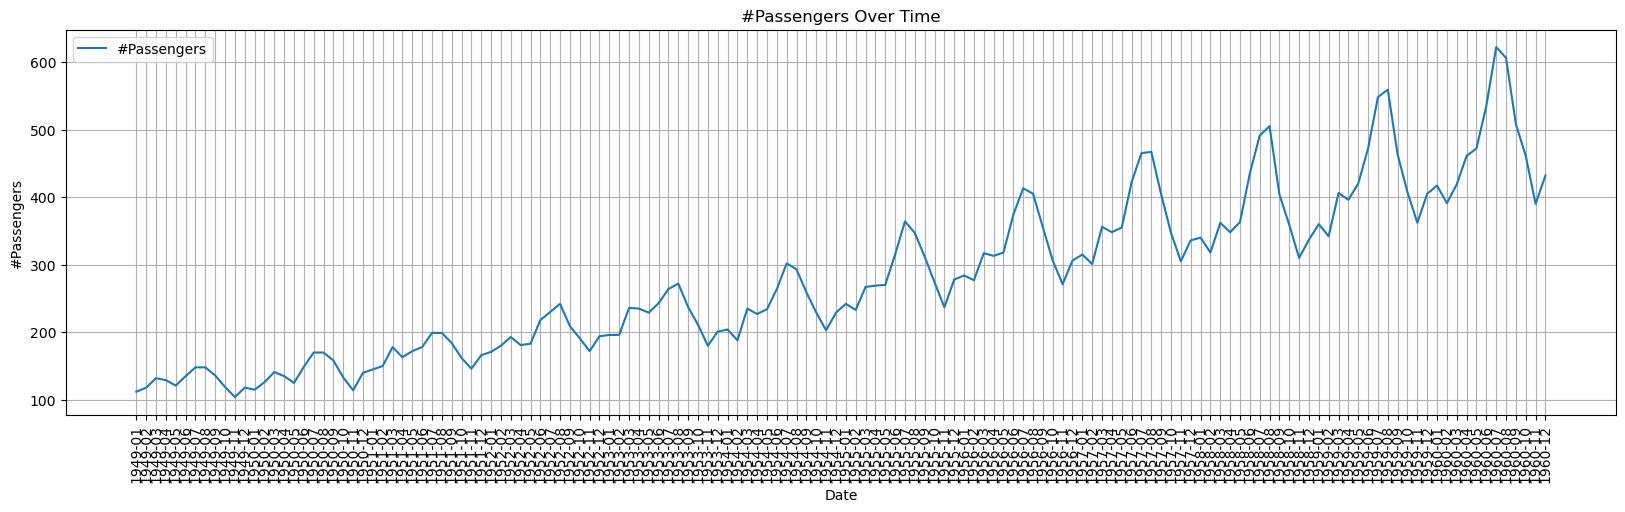

In [3]:
# Set the figure size for the plot
plt.figure(figsize=(20, 5))  # Creates a new figure with a custom size (20 inches wide by 5 inches tall)

# Plot the '#Passengers' column against the index (dates)
plt.plot(df.index, df['#Passengers'], label='#Passengers')  # Plots the '#Passengers' data with the dates on the x-axis and number of passengers on the y-axis

# Add a label to the x-axis
plt.xlabel('Date')  # Sets the label for the x-axis to 'Date'

# Add a label to the y-axis
plt.ylabel('#Passengers')  # Sets the label for the y-axis to '#Passengers'

# Add a title to the plot
plt.title('#Passengers Over Time')  # Sets the title of the plot to '#Passengers Over Time'

# Add a legend to the plot
plt.legend()  # Adds a legend to the plot to indicate what the line represents

# Add a grid to the plot
plt.grid(True)  # Adds a grid to the plot for better readability

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)  # Rotates the x-axis labels by 90 degrees to make them easier to read

# Display the plot
plt.show()  # Displays the plot


In [4]:
# Perform seasonal decomposition
result = seasonal_decompose(df['#Passengers'], model='multiplicative', period=12)  # Decompose the '#Passengers' time series data using a multiplicative model with a period of 12


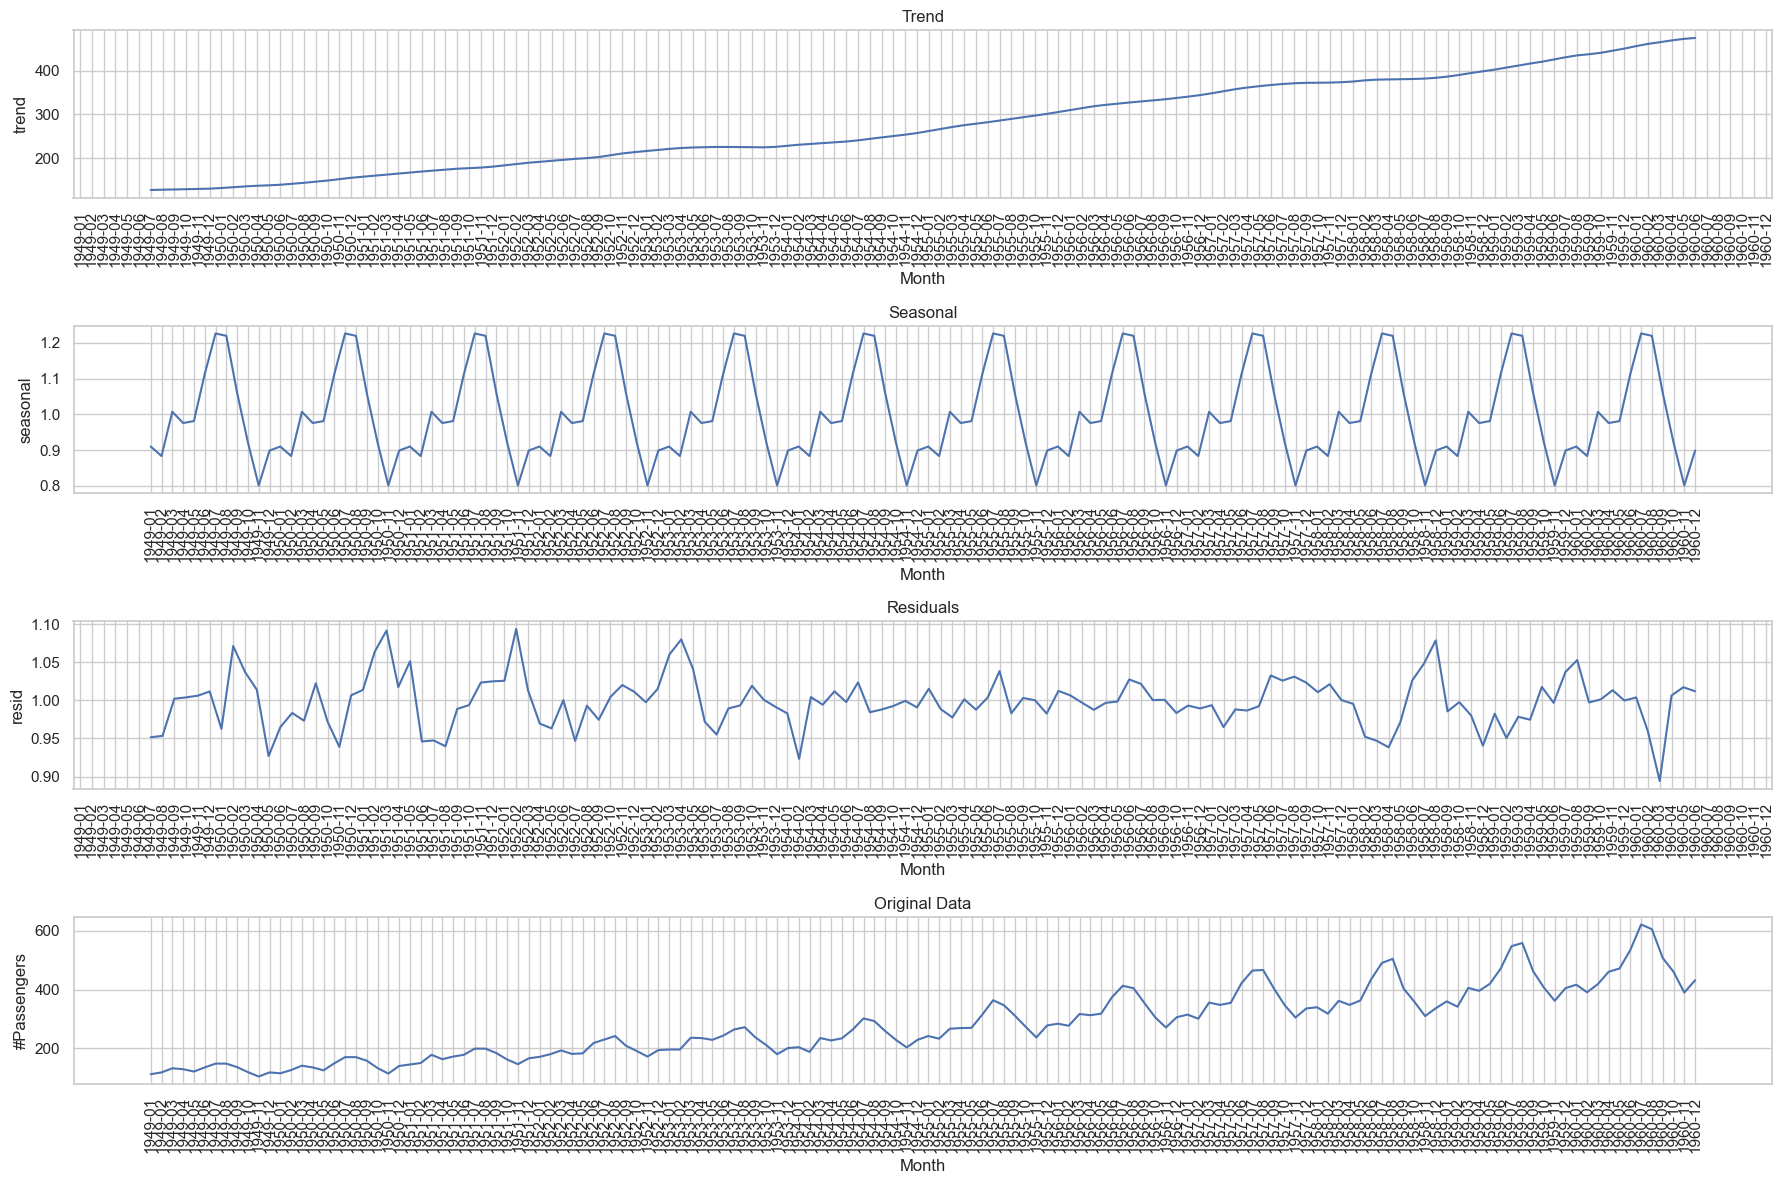

In [5]:
# Import seaborn and set the style for the plots
sns.set(style='whitegrid')  # Setting the style of seaborn plots to 'whitegrid' for better visual appearance

# Create a new figure with specified size
plt.figure(figsize=(18, 12))  # Creating a figure of size 18 inches by 12 inches

# Plot the trend component of the decomposition
plt.subplot(411)  # Creating a subplot (4 rows, 1 column, 1st plot)
sns.lineplot(data=result.trend)  # Plotting the trend component of the decomposition
plt.title('Trend')  # Setting the title of the subplot to 'Trend'
plt.xticks(rotation=90)  # Rotating x-axis labels by 90 degrees for better readability

# Plot the seasonal component of the decomposition
plt.subplot(412)  # Creating a subplot (4 rows, 1 column, 2nd plot)
sns.lineplot(data=result.seasonal)  # Plotting the seasonal component of the decomposition
plt.title('Seasonal')  # Setting the title of the subplot to 'Seasonal'
plt.xticks(rotation=90)  # Rotating x-axis labels by 90 degrees for better readability

# Plot the residual component of the decomposition
plt.subplot(413)  # Creating a subplot (4 rows, 1 column, 3rd plot)
sns.lineplot(data=result.resid)  # Plotting the residual component of the decomposition
plt.title('Residuals')  # Setting the title of the subplot to 'Residuals'
plt.xticks(rotation=90)  # Rotating x-axis labels by 90 degrees for better readability

# Plot the original time series data
plt.subplot(414)  # Creating a subplot (4 rows, 1 column, 4th plot)
sns.lineplot(data=df['#Passengers'])  # Plotting the original '#Passengers' time series data
plt.title('Original Data')  # Setting the title of the subplot to 'Original Data'
plt.xticks(rotation=90)  # Rotating x-axis labels by 90 degrees for better readability

# Adjust the layout to prevent overlap
plt.tight_layout()  # Adjusting subplots to fit into the figure area without overlapping

# Display the plots
plt.show()  # Displaying the final composed plots


In [6]:
seasonal_period = 12

In [7]:
# Import the adfuller function from statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller  # Augmented Dickey-Fuller Test for checking the stationarity of the time series

# Perform the Augmented Dickey-Fuller test on the '#Passengers' column
result = adfuller(df['#Passengers'], autolag='AIC')  # The adfuller function performs the test, 'autolag' set to 'AIC' uses the Akaike Information Criterion to automatically determine the lag length

# Print the ADF Statistic
print('ADF Statistic:', result[0])  # result[0] contains the test statistic for the ADF test

# Print the p-value
print('p-value:', result[1])  # result[1] contains the p-value for the ADF test


ADF Statistic: 0.8153688792060597
p-value: 0.9918802434376411


In [8]:
# Perform first order differencing on the '#Passengers' column
result = adfuller(df['#Passengers'].diff().dropna(), autolag='AIC')  
# .diff() computes the difference between consecutive elements to make the time series stationary
# .dropna() removes any resulting NaN values after differencing
# adfuller() performs the Augmented Dickey-Fuller test on the differenced data
# autolag='AIC' uses the Akaike Information Criterion to automatically select the number of lags

# Print the ADF Statistic
print('ADF Statistic:', result[0])  # result[0] contains the test statistic for the ADF test on the differenced data

# Print the p-value
print('p-value:', result[1])  # result[1] contains the p-value for the ADF test on the differenced data


ADF Statistic: -2.829266824169992
p-value: 0.0542132902838265


In [9]:
# Perform second order differencing on the '#Passengers' column
result = adfuller(df['#Passengers'].diff().diff().dropna(), autolag='AIC')  
# .diff().diff() applies differencing twice to the time series data
# The first .diff() computes the difference between consecutive elements
# The second .diff() computes the difference of the differenced series, which helps to remove both trend and seasonality, making the time series more stationary
# .dropna() removes any resulting NaN values after differencing
# adfuller() performs the Augmented Dickey-Fuller test on the twice-differenced data
# autolag='AIC' uses the Akaike Information Criterion to automatically select the number of lags

# Print the ADF Statistic
print('ADF Statistic:', result[0])  # result[0] contains the test statistic for the ADF test on the second-order differenced data

# Print the p-value
print('p-value:', result[1])  # result[1] contains the p-value for the ADF test on the second-order differenced data


ADF Statistic: -16.384231542468527
p-value: 2.732891850014085e-29


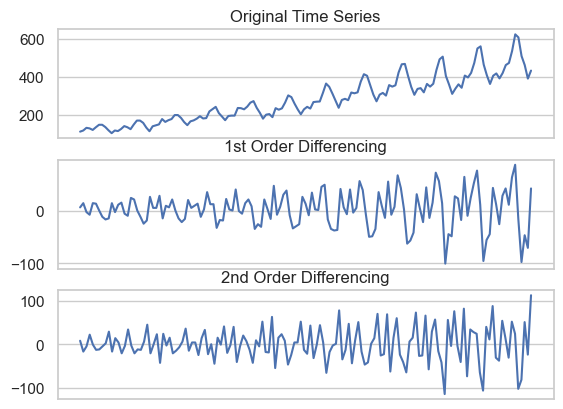

In [10]:
# Plot the differencing values
fig, (ax1, ax2, ax3) = plt.subplots(3)  # Create a figure with 3 subplots (stacked vertically)

# Plot the original time series
ax1.plot(df)  # Plot the original '#Passengers' time series
ax1.set_title('Original Time Series')  # Set the title of the first subplot to 'Original Time Series'
ax1.axes.xaxis.set_visible(False)  # Hide the x-axis labels for the first subplot to avoid clutter

# Plot the first-order differenced time series
ax2.plot(df.diff())  # Plot the first-order differenced '#Passengers' time series
ax2.set_title('1st Order Differencing')  # Set the title of the second subplot to '1st Order Differencing'
ax2.axes.xaxis.set_visible(False)  # Hide the x-axis labels for the second subplot to avoid clutter

# Plot the second-order differenced time series
ax3.plot(df.diff().diff())  # Plot the second-order differenced '#Passengers' time series
ax3.set_title('2nd Order Differencing')  # Set the title of the third subplot to '2nd Order Differencing'
ax3.axes.xaxis.set_visible(False)  # Hide the x-axis labels for the third subplot to avoid clutter

# Display the plots
plt.show()  # Display all the subplots together


In [11]:
# the time series becomes stationary after first order differencing

### Define Parameters for ARIMA

In [12]:
# p = 0 # MA - Moving Average - PACF
# d = 1 # order of differencing - I
# q = 0 # AR - Auto Regressive - ACF

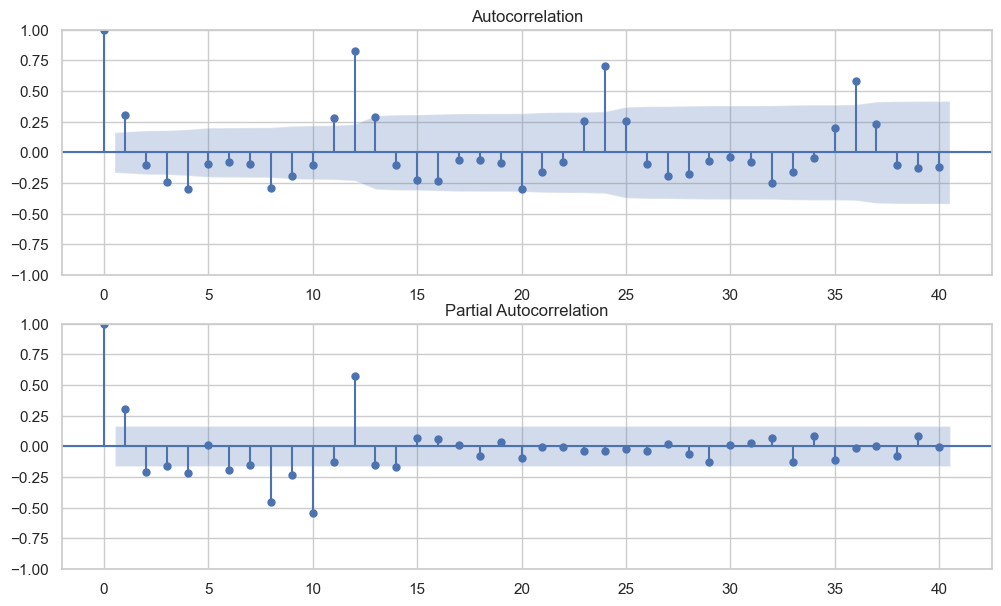

In [13]:
# Create a figure with 2 subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 7))  # Creates a figure with 2 subplots arranged in a single column, with a total figure size of 12 inches by 7 inches

# Plot the Autocorrelation Function (ACF) of the first-order differenced data
sm.graphics.tsa.plot_acf(df.diff().dropna(), lags=40, ax=ax[0])  
# .diff() computes the difference between consecutive elements to make the time series stationary
# .dropna() removes any resulting NaN values after differencing
# plot_acf() plots the ACF up to the specified number of lags
# lags=40 specifies that 40 lags will be included in the ACF plot
# ax=ax[0] specifies that the plot should be drawn on the first subplot

# Plot the Partial Autocorrelation Function (PACF) of the first-order differenced data
sm.graphics.tsa.plot_pacf(df.diff().dropna(), lags=40, ax=ax[1])  
# plot_pacf() plots the PACF up to the specified number of lags
# lags=40 specifies that 40 lags will be included in the PACF plot
# ax=ax[1] specifies that the plot should be drawn on the second subplot

# Display the plots
plt.show()  # Displays the figure with both subplots


In [14]:
p = 2 # pacf
d = 1 # 1st order difference
q = 1 # acf

In [15]:
P = 1
D = 0
Q = 3

### Model Training

In [18]:
# Import the SARIMAX model from statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX  # Importing the SARIMAX class for time series modeling

# Define the ARIMA model with seasonal components
model = SARIMAX(df['#Passengers'], order=(p, d, q), seasonal_order=(P, D, Q, seasonal_period))  
# df['#Passengers']: The time series data to be modeled
# order=(p, d, q): The (p, d, q) parameters for the ARIMA model, where:
#    - p: The number of lag observations included in the model (autoregressive part)
#    - d: The number of times that the raw observations are differenced (differencing part)
#    - q: The size of the moving average window (moving average part)
# seasonal_order=(P, D, Q, seasonal_period): The seasonal component parameters, where:
#    - P: The number of seasonal autoregressive terms
#    - D: The number of seasonal differences
#    - Q: The number of seasonal moving average terms
#    - seasonal_period: The number of observations per cycle (e.g., 12 for monthly data with yearly seasonality)

# Fit the ARIMA model to the data
fitted_model = model.fit()  # Fits the SARIMAX model to the data using maximum likelihood estimation

# Print the summary of the fitted model
print(fitted_model.summary())  # Prints a summary of the fitted model, including parameters and diagnostics


                                         SARIMAX Results                                          
Dep. Variable:                                #Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -563.224
Date:                                    Wed, 18 Dec 2024   AIC                           1142.448
Time:                                            18:32:50   BIC                           1166.151
Sample:                                        01-01-1949   HQIC                          1152.080
                                             - 12-01-1960                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6247      0.101      6.170      0

### Forecasting

In [19]:
# Define the number of steps to forecast
forecast_steps = 24  # Setting the number of forecasting steps to 24, which corresponds to 24 months (2 years)

# Generate the forecast for the specified number of steps
forecast = fitted_model.get_forecast(steps=forecast_steps)  
# fitted_model.get_forecast() generates forecasted values for the given number of steps based on the fitted ARIMA model

# Create the date range for the forecasted values
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='M')[1:].strftime('%Y-%m')  
# pd.date_range() creates a range of dates starting from the last date in the original data
# periods=forecast_steps+1 specifies the number of periods to generate (24 steps plus the starting date)
# freq='M' indicates that the frequency of the date range is monthly
# [1:] removes the starting date from the range to get only the forecasted dates
# strftime('%Y-%m') formats the dates as 'YYYY-MM'


In [20]:
# Create a forecast DataFrame
forecast_df = pd.DataFrame({
    "Forecast": list(forecast.predicted_mean),  # forecast.predicted_mean contains the mean predicted values from the forecast
    "Lower CI": list(forecast.conf_int().iloc[:, 0]),  # forecast.conf_int() provides the confidence intervals; iloc[:, 0] selects the lower bound
    "Upper CI": list(forecast.conf_int().iloc[:, 1])   # iloc[:, 1] selects the upper bound of the confidence intervals
}, index=forecast_index)  # Setting the index of the DataFrame to the forecasted date range

# Display the first few rows of the forecast DataFrame to verify its content
forecast_df.head()  # Shows the first five rows of the forecast DataFrame


,Forecast,Lower CI,Upper CI
1961-01,446.728132,424.884418,468.571845
1961-02,423.354516,397.217023,449.492009
1961-03,456.481533,426.865410,486.097657
1961-04,491.604168,459.572999,523.635336
1961-05,505.178266,471.297560,539.058971


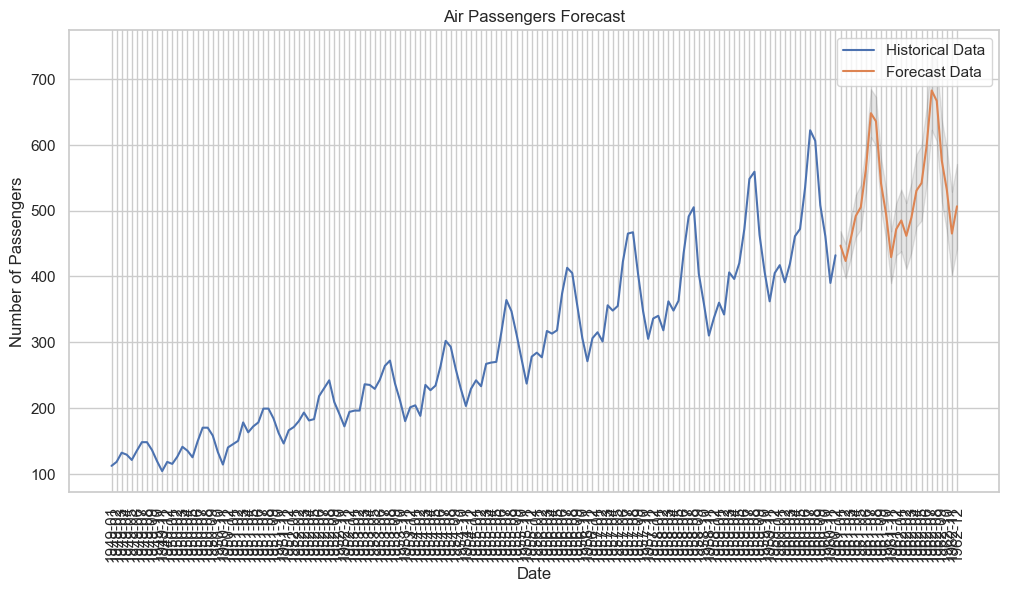

In [21]:
# Plot the forecast values

plt.figure(figsize=(12, 6))  # Create a new figure with a specified size (12 inches by 6 inches)

# Plot the historical data
plt.plot(df['#Passengers'], label='Historical Data')  
# Plot the '#Passengers' column from the original DataFrame
# label='Historical Data' adds a label for the historical data in the legend

# Plot the forecast data
plt.plot(forecast_df['Forecast'], label='Forecast Data')  
# Plot the 'Forecast' column from the forecast DataFrame
# label='Forecast Data' adds a label for the forecast data in the legend

# Shade the area between the lower and upper confidence intervals
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], color='k', alpha=0.1)  
# fill_between() fills the area between 'Lower CI' and 'Upper CI' with a semi-transparent color
# forecast_df.index specifies the x-axis (dates)
# color='k' sets the color to black
# alpha=0.1 sets the transparency level to 10%

# Add labels and title
plt.xlabel('Date')  # Set the label for the x-axis to 'Date'
plt.ylabel('Number of Passengers')  # Set the label for the y-axis to 'Number of Passengers'
plt.title('Air Passengers Forecast')  # Set the title of the plot to 'Air Passengers Forecast'

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees to make them easier to read

# Add a legend to the plot
plt.legend()  # Display the legend on the plot

# Display the plot
plt.show()  # Render and display the plot
